<a href="https://colab.research.google.com/github/ImenMasmoudiEm/CodeClause_Detection_of_the_Parkinson-s_Disease/blob/main/Detection_of_the_Parkinson's_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Detection of the Parkinson's Disease

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

os.chdir("/content/drive/MyDrive/All/Projects/CodeClause/Detection of the Parkinson's Disease")

In [3]:
import pandas as pd

df = pd.read_csv('pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [5]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [6]:
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
corr_matrix = df.corr()
print(corr_matrix)

                                 id    gender       PPE       DFA      RPDE  \
id                         1.000000 -0.133605  0.026667  0.041938 -0.084606   
gender                    -0.133605  1.000000  0.010175  0.099356  0.168321   
PPE                        0.026667  0.010175  1.000000 -0.094775 -0.405558   
DFA                        0.041938  0.099356 -0.094775  1.000000  0.155075   
RPDE                      -0.084606  0.168321 -0.405558  0.155075  1.000000   
...                             ...       ...       ...       ...       ...   
tqwt_kurtosisValue_dec_33 -0.053781  0.107618  0.045755 -0.033914 -0.097161   
tqwt_kurtosisValue_dec_34 -0.058034  0.128936  0.046175  0.043454 -0.036406   
tqwt_kurtosisValue_dec_35 -0.057807  0.107734  0.037385  0.067843 -0.018052   
tqwt_kurtosisValue_dec_36 -0.055775  0.104828  0.039588  0.116699  0.021945   
class                     -0.111661  0.182713 -0.072939  0.306070  0.247444   

                           numPulses  numPeriodsPul

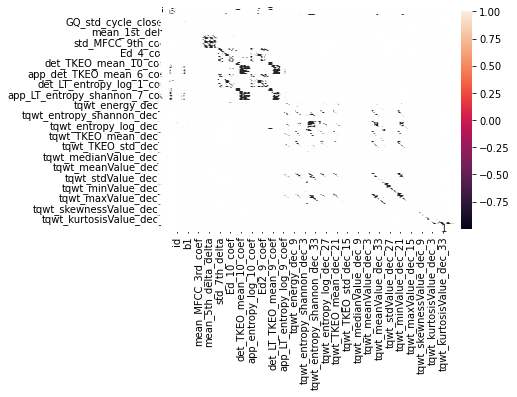

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corr_matrix, annot=True)
plt.show()

In [32]:
df_columns = df.columns.to_list()
c=0
j == 'class'
for i in df.columns:
  if (abs(corr_matrix[i][j]) > 0.34):
    print(corr_matrix[i][j])
    print(i, ' and ', j)
    c+=1
print(c)

0.39869532383637335
mean_MFCC_2nd_coef  and  class
0.3428754568881086
std_8th_delta  and  class
0.3490458149141272
std_6th_delta_delta  and  class
0.3542390686754891
std_7th_delta_delta  and  class
0.3642562993989767
std_8th_delta_delta  and  class
0.3643329784187203
std_9th_delta_delta  and  class
-0.34789879712823146
tqwt_entropy_shannon_dec_11  and  class
-0.34232670431120016
tqwt_entropy_log_dec_11  and  class
-0.38100274065080136
tqwt_entropy_log_dec_12  and  class
-0.34039461844295815
tqwt_TKEO_std_dec_12  and  class
-0.3910810373525166
tqwt_stdValue_dec_11  and  class
-0.39302880603043416
tqwt_stdValue_dec_12  and  class
-0.353248698713792
tqwt_stdValue_dec_13  and  class
0.36655202007366494
tqwt_minValue_dec_11  and  class
0.39574020967018975
tqwt_minValue_dec_12  and  class
0.3652644169527593
tqwt_minValue_dec_13  and  class
-0.3784847808014886
tqwt_maxValue_dec_11  and  class
-0.3912875991464583
tqwt_maxValue_dec_12  and  class
-0.3618003014169519
tqwt_maxValue_dec_13  and  c

In [25]:
'class' in df_columns

True

In [33]:
L = []
for i in df.columns:
  if (abs(corr_matrix[i][j]) > 0.34):
    L.append(i)

In [34]:
V = []
for i in df_columns:
  if i not in L:
    V.append(i)

In [35]:
'id' in V

True

In [36]:
'class' in V

False

In [43]:
V.append('class')

In [44]:
X = df.drop(V,axis=1)
y = df['class']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [46]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
accuracy_score(y_test, lr_pred)

0.8355263157894737

Naive Bias Classifier

In [48]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred_train = clf.predict(X_train)


print("|| Train Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
print("|| Test Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")

|| Train Accuracy GaussianNB Model :=> 80.63%  ||
|| Test Accuracy GaussianNB Model :=> 79.61%  ||


#Ressources

https://datatofish.com/correlation-matrix-pandas/

